In [209]:
import pandas as pd
import numpy as np
import quandl
import requests
import random
from dotenv import load_dotenv
import os
import requests
import json
import yfinance as yf
import matplotlib.pyplot as plt



In [182]:
# Get weapons stock data for Gulf War
tickerStrings = ["LMT", "BA", "RTX", "NOC"]
df_list = list()
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker", start="1990-02-01", end="1991-02-28")
    data["ticker"] = ticker  # add this column because the dataframe doesn't contain a column with the ticker
    df_list.append(data)

# combine all dataframes into a single dataframe
weapons_gulf_df = pd.concat(df_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [183]:
weapons_gulf_df

,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
1990-02-01,11.963190,11.963190,11.694785,11.733129,4.849934,163000,LMT
1990-02-02,11.656442,11.924847,11.656442,11.924847,4.929178,399676,LMT
1990-02-05,12.039877,12.078221,11.694785,11.694785,4.834085,421192,LMT
1990-02-06,11.694785,11.694785,11.273006,11.311350,4.675592,262430,LMT
1990-02-07,11.273006,11.388037,11.081288,11.273006,4.659739,567892,LMT
...,...,...,...,...,...,...,...
1991-02-21,11.350219,11.576094,11.237281,11.293750,5.196211,648810,NOC
1991-02-22,11.293750,11.576094,11.237281,11.293750,5.196211,410847,NOC
1991-02-25,11.406688,11.519625,11.180813,11.293750,5.196211,408190,NOC


In [184]:
# Convert dataframe to csv
weapons_gulf_df.to_csv("weapons_gulf.csv")

In [185]:
# Get weapon stock data for Russia-Ukraine Invasion

df_list = list()
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker", start="2021-08-24", end="2022-07-29")
    data["ticker"] = ticker  # add this column because the dataframe doesn't contain a column with the ticker
    df_list.append(data)

# combine all dataframes into a single dataframe
weapons_rusua_df = pd.concat(df_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [186]:
weapons_rusua_df

,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
2021-08-24,358.970001,360.489990,357.920013,359.000000,348.898315,822600,LMT
2021-08-25,359.690002,360.649994,357.989990,358.750000,348.655365,953500,LMT
2021-08-26,359.100006,361.980011,357.239990,361.619995,351.444580,1172400,LMT
2021-08-27,363.290009,364.329987,361.179993,361.989990,351.804199,1203900,LMT
2021-08-30,362.250000,363.959991,361.750000,362.049988,351.862488,986000,LMT
...,...,...,...,...,...,...,...
2022-07-22,457.369995,463.260010,450.010010,451.850006,451.850006,864700,NOC
2022-07-25,451.890015,459.739990,451.109985,453.320007,453.320007,826500,NOC
2022-07-26,453.149994,455.109985,444.309998,444.649994,444.649994,702500,NOC


In [187]:
# Convert dataframe to csv
weapons_rusua_df.to_csv("weapons_rusua.csv")

In [188]:
# Import crude oil prices from csv
crude_df = pd.read_csv("Resources/Cushing_OK_WTI_Spot_Price_FOB.csv")
crude_df = crude_df.rename(columns={"Cushing OK WTI Spot Price FOB Dollars per Barrel":"WTI in Dollars Per Barrel"})

In [189]:
# Check for null values
crude_df.isnull().sum()

Month                        0
WTI in Dollars Per Barrel    0
dtype: int64

In [190]:
# Change "Month" column to datetime object
crude_df["Month"]=pd.to_datetime(crude_df["Month"])

In [191]:
# Set "Month" as the index
crude_df.set_index("Month", inplace=True)

In [192]:
# Create Data Frame for oil prices during the Russian / Ukrainian Conflict
rus_ua_oil = crude_df.iloc[0:11,:]

In [193]:
# Create Data Frame for oil prices during the Gulf War
gulf_oil = crude_df.loc["Feb 1990":"Dec 1990"]

In [194]:
## function to graph data 

def plot_graph(df, title:str, y_label: str):
    
        ## graphing the data

    cols =[col for col in df.columns]

    fig,ax = plt.subplots(1,1, figsize = (14,6))
    plt.style.use('seaborn')

    for c in cols: 
        ax.plot(c, linewidth=2, data=df)
        ax.set_title(title)
        plt.xlabel('Date')
        plt.ylabel(y_label)

        handles,labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc='upper left', prop = {"size":10})

    plt.show()

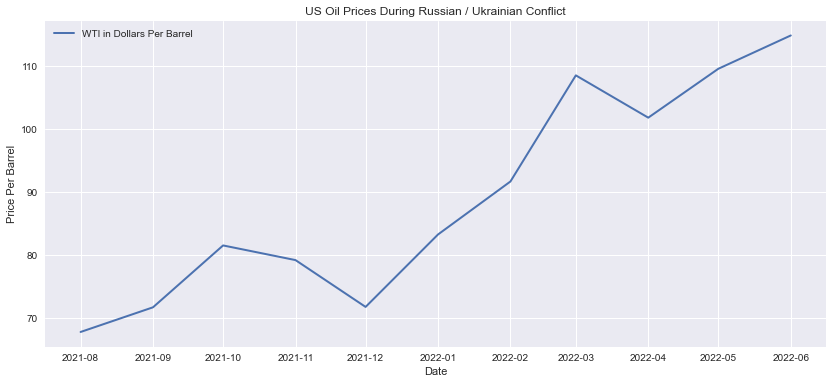

In [195]:
# Plot the data

plot_graph(rus_ua_oil, title="US Oil Prices During Russian / Ukrainian Conflict", y_label="Price Per Barrel")

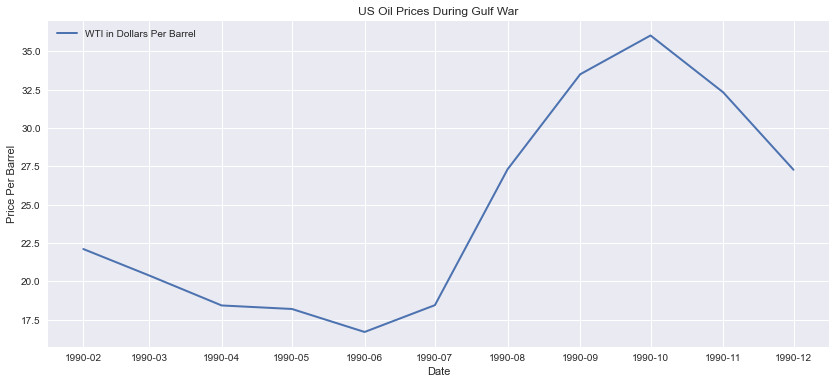

In [196]:
plot_graph(gulf_oil, title="US Oil Prices During Gulf War", y_label="Price Per Barrel")

In [197]:
# Create data frame for oil prices during war in Iraq
iraq_oil = crude_df.loc["Mar 2003":"Dec 2011"]

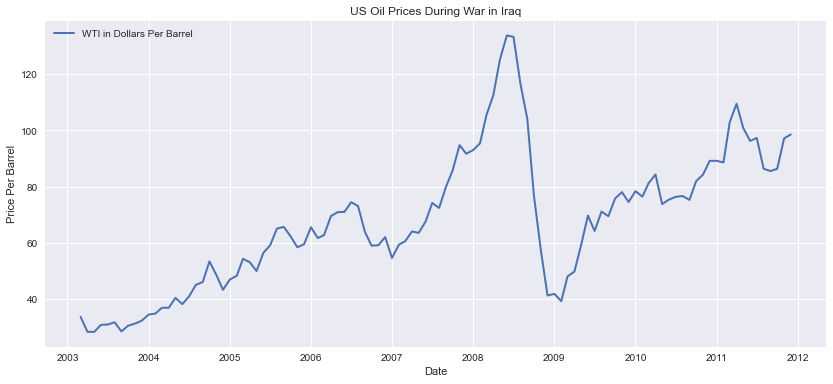

In [199]:
# Plot graph for war in Iraq
plot_graph(iraq_oil, title="US Oil Prices During War in Iraq", y_label="Price Per Barrel")

In [251]:
# Get gas stock data for War in Iraq
tickerStrings = ["XOM", "BP", "COP", "CVX"]
df_list = list()
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker", start="2003-03-01", end="2011-12-15")
    data["ticker"] = ticker  # add this column because the dataframe doesn't contain a column with the ticker
    df_list.append(data)

# combine all dataframes into a single dataframe
gas_iraq_df = pd.concat(df_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [252]:
# Convert dataframe to csv
gas_iraq_df.to_csv("gas_iraq.csv")

In [253]:
gas_iraq_df = gas_iraq_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])

In [254]:
gas_iraq_df = gas_iraq_df.pivot(columns = "ticker", values = "Close")

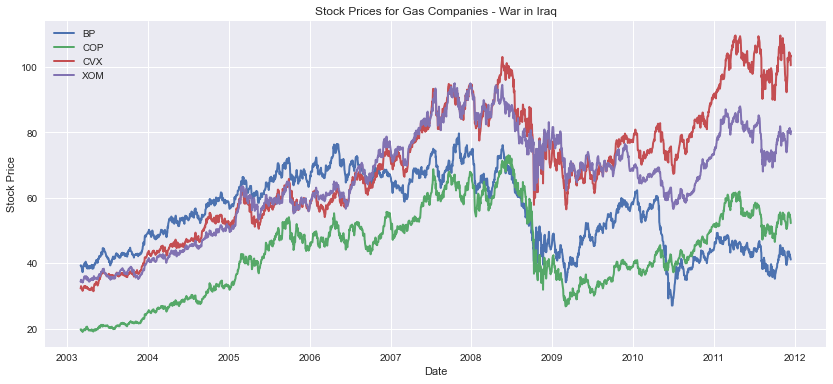

In [274]:
plot_graph(gas_iraq_df, title="Stock Prices for Gas Companies - War in Iraq", y_label="Stock Price")

In [269]:
# Get weapons stock data for War in Iraq
tickerStrings = ["LMT", "BA", "RTX", "NOC"]
df_list = list()
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker", start="2003-03-01", end="2011-12-15")
    data["ticker"] = ticker  # add this column because the dataframe doesn't contain a column with the ticker
    df_list.append(data)

# combine all dataframes into a single dataframe
weapons_iraq_df = pd.concat(df_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [270]:
# Convert dataframe to csv
weapons_iraq_df.to_csv("weapons_iraq.csv")

In [271]:
weapons_iraq_df = weapons_iraq_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])

In [272]:
weapons_iraq_df = weapons_iraq_df.pivot(columns = "ticker", values = "Close")

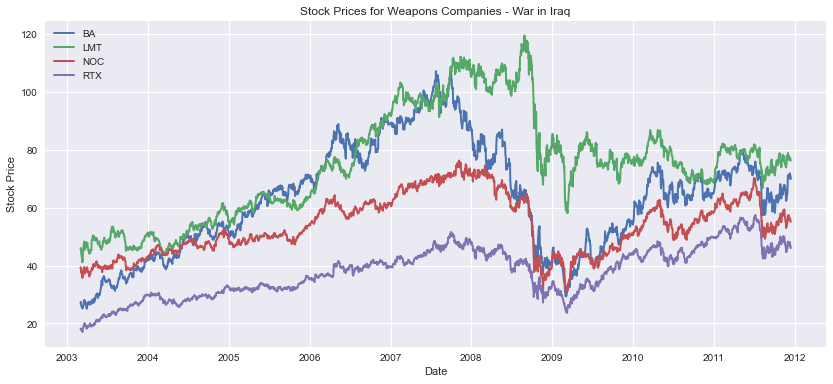

In [273]:
plot_graph(weapons_iraq_df, title="Stock Prices for Weapons Companies - War in Iraq", y_label="Stock Price")

In [200]:
# Load .env environment variables
load_dotenv()

True

In [201]:
# Get the environment variables
q_API_KEY = os.getenv('NASDAQ_API_KEY')

In [203]:
# Set the API Key
quandl.ApiConfig.api_key = q_API_KEY

In [204]:
# Get unemployment data during the war in Iraq

iraq_unemp_df = quandl.get(["FRED/UNRATE", "FRED/UNEMPLOY"], trim_start = "2003-03-1", trim_end="2011-12-15", collapse = 'monthly')
iraq_unemp_df.columns = ['Iraq_unemploy_rate', 'Iraq_unemploy_level']


iraq_unemp_df

,Iraq_unemploy_rate,Iraq_unemploy_level
Date,,
2003-03-31,5.9,8588.0
2003-04-30,6.0,8842.0
2003-05-31,6.1,8957.0
2003-06-30,6.3,9266.0
2003-07-31,6.2,9011.0
...,...,...
2011-08-31,9.0,13818.0
2011-09-30,9.0,13948.0
2011-10-31,8.8,13594.0


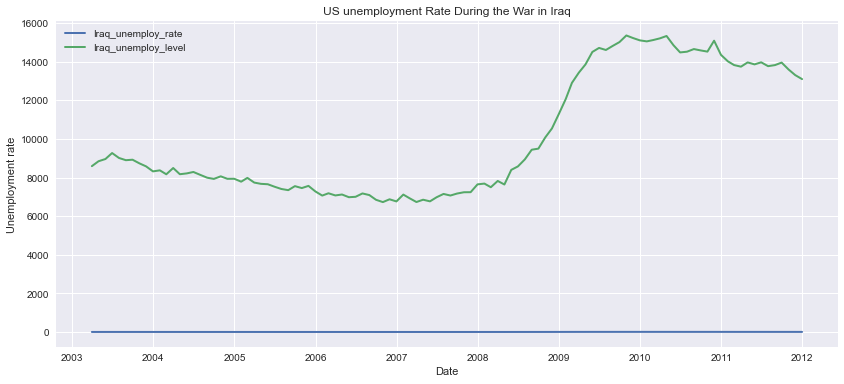

In [205]:
# Plot the graph of US unemployment during the war in Iraq
plot_graph(iraq_unemp_df, title="US unemployment Rate During the War in Iraq", y_label="Unemployment rate")

In [206]:
# Use Zillow to get historical data to get data for housing prices during the war in Iraq 

zillow_indicators = quandl.get_table("ZILLOW/INDICATORS", paginate=True)

# Since we are looking at home values

mask = zillow_indicators['category']=='Home values'
# This df describes the indicators present in the data set. We are going to use the 
# the ZALL indicatro (ZHVI All Homes(SFR, Condo/Co-op))
home_values_ind = zillow_indicators[mask]

# Get the zillow regions available on the API
zillow_regions = quandl.get_table('ZILLOW/REGIONS', paginate= True)

In [207]:
# Gather all US the States
states = ['IA', 'KS', 'UT', 'VA', 'NC', 'NE', 'SD', 'AL', 'ID', 'FM', 'DE', 'AK', 'CT', 'PR', 'NM', 'MS', 'PW', 'CO', 'NJ', 'FL', 'MN', 'VI', 'NV', 'AZ', 'WI', 'ND', 'PA', 'OK', 'KY', 'RI', 'NH', 'MO', 'ME', 'VT', 'GA', 'GU', 'AS', 'NY', 'CA', 'HI', 'IL', 'TN', 'MA', 'OH', 'MD', 'MI', 'WY', 'WA', 'OR', 'MH', 'SC', 'IN', 'LA', 'MP', 'DC', 'MT', 'AR', 'WV', 'TX']

##  The zip region column is list of strings we will use the zip field to find the state in which
##  the region exists. 
## function to get the states in the region_field

def state_check(search_field): 
    ## separating the search field data set into a list
    search_field = [elem.strip() for elem in search_field.split(";")]
    
    for elem in search_field:
        if elem in states: 
            return elem
        
## creating a state field. Using the zip region 
mask = zillow_regions['region_type']=='zip'

zillow_regions_zip = zillow_regions[mask].copy()

## Creating a state column using the state_check function
zillow_regions_zip['state'] = zillow_regions_zip.apply(lambda x: state_check(x['region']), axis =1)

zillow_regions_zip

,region_id,region_type,region,state
None,,,,
0,99999,zip,98847; WA; Wenatchee; Chelan County; Peshastin,WA
1,99998,zip,98846; WA; Okanogan County; Pateros,WA
2,99997,zip,98845; WA; Wenatchee; Douglas County; Palisades,WA
3,99996,zip,98844; WA; Okanogan County; Oroville,WA
4,99995,zip,98843; WA; Wenatchee; Douglas County; Orondo,WA
...,...,...,...,...
79243,100004,zip,98852; WA; Okanogan County; Winthrop,WA
79244,100003,zip,98851; WA; Moses Lake; Grant County; Soap Lake,WA
79245,100002,zip,98850; WA; Wenatchee; Douglas County; Rock Island,WA


In [210]:
## loop to get the house market prices for all the states. 
## since each state could have several region_ids in excess of a 1000, 
## Use a random sample of 30 from each state to calculate the average housing prices 
## of each state
## This part might take some time and therefore you should give it about 5-10 minutes to complete
## The function will print out the iteration number to show its progress. Ends at iteration 58


for id, state in enumerate(states):
    
    ## getting the rows with the current state value
    mask = zillow_regions_zip['state']==state
    
    ## filtering the rows out in the dataframe
    zillow_ak = zillow_regions_zip[mask]
    
    ##getting the region_ids for that particular state
    region_ids = zillow_ak['region_id'].unique()
    
    ## to monitor the progress
    print(id)
    ## creating a list of the region ids so as to get that with those particular IDs
    ids = list(region_ids)
    
    
    
    ## Checking if ids are greater than 100 since we are only going to pick a random sample of 100
    if len(ids)>100:
        r_ids = random.sample(ids, 30)
    elif len(ids)==0:
        continue
    else: 
        r_ids = ids
    
      
    ### getting the dataframe containing the house prices using the ZALL indicator id from the home_values_ind 
    ## dataframe
    df = quandl.get_table('ZILLOW/DATA', indicator_id="ZALL", region_id=r_ids , paginate = True)
    
    ### grouping the values by date and then finding the average
    
    data = df.groupby(['date'])['value'].mean()
    
    ## Checking if it is the first iteration: 
    if id==0: 
        data_df = pd.DataFrame(data)
        data_df.rename(columns = {'value': state}, inplace = True)
        data_df.reset_index(inplace = True)
    else:
        new_df = pd.DataFrame(data)
        new_df.rename(columns = {'value': state}, inplace = True)
        new_df.reset_index(inplace = True)
        data_df = pd.merge(data_df, new_df, how = 'left')
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58


In [294]:
## Get data for the war in Iraq 
# Make sure the index is set to 'index'

data_df = data_df.loc["2003-03-01":"2011-12-15"]

## Data containing average prices during the war in Iraq

data_df = data_df.round(2)

## Calculating the national average
iraq_df['national_average'] = data_df.mean(axis=1).round(2)

iraq_df['national_median'] = data_df.median(axis=1).round(2)

iraq_df

,IA,KS,UT,VA,NC,NE,SD,AL,ID,DE,...,SC,IN,LA,DC,MT,AR,WV,TX,national_average,national_median
date,,,,,,,,,,,,,,,,,,,,,
2003-03-31,102731.38,157743.18,198493.46,134937.38,140564.23,115565.55,137403.00,96872.00,159209.25,236112.09,...,114863.11,101584.07,153720.38,216077.71,202169.00,80724.41,57071.31,161161.58,164746.66,153720.38
2003-04-30,103180.12,157600.91,198626.23,136012.69,140050.79,116007.64,138168.50,96507.41,159746.50,239260.37,...,115090.53,102096.29,154049.75,219040.14,203670.00,80900.53,57316.69,160857.83,165747.65,154049.75
2003-05-31,103636.00,157701.27,198825.46,137332.77,140295.50,116368.55,138324.00,96674.35,160306.00,242428.09,...,115320.21,102287.33,154085.88,221700.29,204795.50,81057.06,57494.31,160655.00,166769.72,154085.88
2003-06-30,101544.56,158067.18,199007.69,138410.08,140561.36,116541.27,138842.50,96919.94,161091.75,245547.91,...,115461.05,102315.40,154281.62,225045.14,206128.50,81298.00,57595.54,160806.92,167605.01,152384.87
2003-07-31,102034.11,158756.36,198972.00,139344.46,140840.00,116649.27,139246.50,97300.35,183999.00,248680.70,...,115636.68,102177.20,154235.25,228525.71,207256.00,81615.94,57744.77,160891.75,169081.77,153582.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-07-31,101929.73,134832.23,194834.43,166501.81,148917.38,121386.15,137000.61,102358.09,146452.63,259619.47,...,116155.17,97898.81,132751.19,365991.62,214679.05,85520.29,70005.82,139583.43,173165.27,147685.00
2011-08-31,102318.50,134715.55,194992.64,166235.00,148435.23,121488.30,136941.56,102285.00,146361.20,258776.47,...,115897.87,97755.25,132794.05,365871.12,214428.55,85492.14,70032.12,139816.35,172771.68,147398.22
2011-09-30,102612.92,134679.18,194767.89,166076.52,147958.08,121702.85,136934.78,102198.87,146410.30,257318.93,...,115623.30,97779.46,132845.00,366480.50,214073.35,85387.52,70115.41,140140.52,172334.63,147184.19


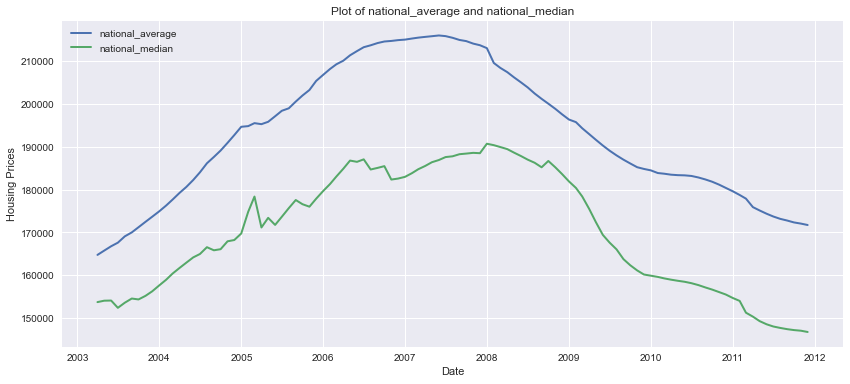

In [297]:
## plotting the national average and national median 

cols =['national_average', 'national_median']

fig,ax = plt.subplots(1,1, figsize = (14,6))
plt.style.use('seaborn')

for c in cols: 
    ax.plot(c, linewidth=2, data=iraq_df)
    ax.set_title('Plot of national_average and national_median')
    plt.xlabel('Date')
    plt.ylabel('Housing Prices')

    handles,labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='upper left', prop = {"size":10})

plt.show()

# Create Housing CSVs

In [361]:
states_df = pd.read_csv("Resources/states.csv")
states_df.head()

,state,latitude,longitude,name
0,AK,63.588753,-154.493062,Alaska
1,AL,32.318231,-86.902298,Alabama
2,AR,35.201050,-91.831833,Arkansas
3,AZ,34.048928,-111.093731,Arizona
4,CA,36.778261,-119.417932,California


In [364]:
iraq_df=iraq_df.set_index("date")
iraq_df

,IA,KS,UT,VA,NC,NE,SD,AL,ID,DE,...,SC,IN,LA,DC,MT,AR,WV,TX,national_average,national_median
date,,,,,,,,,,,,,,,,,,,,,
2003-03-31,102731.38,157743.18,198493.46,134937.38,140564.23,115565.55,137403.00,96872.00,159209.25,236112.09,...,114863.11,101584.07,153720.38,216077.71,202169.00,80724.41,57071.31,161161.58,164746.66,153720.38
2003-04-30,103180.12,157600.91,198626.23,136012.69,140050.79,116007.64,138168.50,96507.41,159746.50,239260.37,...,115090.53,102096.29,154049.75,219040.14,203670.00,80900.53,57316.69,160857.83,165747.65,154049.75
2003-05-31,103636.00,157701.27,198825.46,137332.77,140295.50,116368.55,138324.00,96674.35,160306.00,242428.09,...,115320.21,102287.33,154085.88,221700.29,204795.50,81057.06,57494.31,160655.00,166769.72,154085.88
2003-06-30,101544.56,158067.18,199007.69,138410.08,140561.36,116541.27,138842.50,96919.94,161091.75,245547.91,...,115461.05,102315.40,154281.62,225045.14,206128.50,81298.00,57595.54,160806.92,167605.01,152384.87
2003-07-31,102034.11,158756.36,198972.00,139344.46,140840.00,116649.27,139246.50,97300.35,183999.00,248680.70,...,115636.68,102177.20,154235.25,228525.71,207256.00,81615.94,57744.77,160891.75,169081.77,153582.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-07-31,101929.73,134832.23,194834.43,166501.81,148917.38,121386.15,137000.61,102358.09,146452.63,259619.47,...,116155.17,97898.81,132751.19,365991.62,214679.05,85520.29,70005.82,139583.43,173165.27,147685.00
2011-08-31,102318.50,134715.55,194992.64,166235.00,148435.23,121488.30,136941.56,102285.00,146361.20,258776.47,...,115897.87,97755.25,132794.05,365871.12,214428.55,85492.14,70032.12,139816.35,172771.68,147398.22
2011-09-30,102612.92,134679.18,194767.89,166076.52,147958.08,121702.85,136934.78,102198.87,146410.30,257318.93,...,115623.30,97779.46,132845.00,366480.50,214073.35,85387.52,70115.41,140140.52,172334.63,147184.19


In [351]:
iraq_df=iraq_df.reset_index()

In [367]:
states_df.head(2)

,state,latitude,longitude,name
0,AK,63.588753,-154.493062,Alaska
1,AL,32.318231,-86.902298,Alabama


In [393]:
iraq_df2 = iraq_df.T.reset_index()

In [378]:
# iraq_df2["index"]

In [395]:
iraq_df2.rename(columns = {
    "index":"state"
}, inplace = True)

In [385]:
# iraq_df2.columns = iraq_df2.columns.str.replace("index","state")

In [396]:
iraq_df2.head(2)

date,state,2003-03-31 00:00:00,2003-04-30 00:00:00,2003-05-31 00:00:00,2003-06-30 00:00:00,2003-07-31 00:00:00,2003-08-31 00:00:00,2003-09-30 00:00:00,2003-10-31 00:00:00,2003-11-30 00:00:00,...,2011-02-28 00:00:00,2011-03-31 00:00:00,2011-04-30 00:00:00,2011-05-31 00:00:00,2011-06-30 00:00:00,2011-07-31 00:00:00,2011-08-31 00:00:00,2011-09-30 00:00:00,2011-10-31 00:00:00,2011-11-30 00:00:00
0,IA,102731.38,103180.12,103636.00,101544.56,102034.11,102690.89,103267.22,103881.67,104276.11,...,103084.12,102921.00,102778.44,102618.56,102636.32,101929.73,102318.50,102612.92,102848.88,102939.12
1,KS,157743.18,157600.91,157701.27,158067.18,158756.36,159329.18,159962.82,160507.27,160838.64,...,136332.32,135896.59,135364.05,135004.77,134860.09,134832.23,134715.55,134679.18,134377.41,134152.36


In [397]:
combined = pd.merge(iraq_df2, states_df, how = "left", on = ["state", "state"]).set_index("state")

In [399]:
combined.to_csv("iraq_housing.csv")

In [ ]:
## Get data for the war in Iraq 
# Make sure the index is set to 'index'

data_df = data_df.loc["2003-03-01":"2011-12-15"]

## Data containing average prices during the war in Iraq

data_df = data_df.round(2)

## Calculating the national average
iraq_df['national_average'] = data_df.mean(axis=1).round(2)

iraq_df['national_median'] = data_df.median(axis=1).round(2)

iraq_df